In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
 
# Import project helpers
from src.data_loading import load_transactions, load_products
from src.preprocessing_transactions import get_transactions_dataset
from src.preprocessing_products import get_products_dataset
from src.evaluation import evaluate_classifier, evaluate_and_plot_classifier

In [ ]:
# Load the transactions data
df_products = load_products()
df_products.info()
df_products.describe()

product_results = {
    "logreg" : None,
    "rf" : None,
    "knn" : None,
    "gb" : None,
    "svm" : None
}
trained_models = {}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                5000 non-null   object 
 1   seller_id                 5000 non-null   object 
 2   category                  5000 non-null   object 
 3   brand                     5000 non-null   object 
 4   price                     5000 non-null   float64
 5   seller_rating             5000 non-null   float64
 6   seller_reviews            5000 non-null   int64  
 7   product_images            5000 non-null   int64  
 8   description_length        5000 non-null   int64  
 9   shipping_time_days        5000 non-null   int64  
 10  spelling_errors           5000 non-null   int64  
 11  domain_age_days           5000 non-null   int64  
 12  contact_info_complete     5000 non-null   bool   
 13  return_policy_clear       5000 non-null   bool   
 14  payment_

In [89]:
feature_cols = ['price', 'seller_rating', 'seller_reviews', 'product_images', 'description_length', 'shipping_time_days', 'spelling_errors', 'domain_age_days', 'payment_methods_count', 'views', 'purchases', 'wishlist_adds', 'certification_badges', 'warranty_months']
corr = df_products[feature_cols + ['is_counterfeit']].corr()['is_counterfeit'].sort_values()
print(corr)

payment_methods_count   -0.841770
seller_rating           -0.809984
product_images          -0.772673
description_length      -0.741478
domain_age_days         -0.718089
seller_reviews          -0.684206
price                   -0.576817
wishlist_adds           -0.001506
warranty_months          0.001331
views                    0.004539
certification_badges     0.005683
purchases                0.005975
spelling_errors          0.773749
shipping_time_days       0.867171
is_counterfeit           1.000000
Name: is_counterfeit, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test, preprocessor = get_products_dataset()

# Define Logistic Regression classifier (linear model for classification)
logreg = LogisticRegression(
    max_iter=1000,   # increase iterations to ensure convergence
    random_state=42, # reproducible
    n_jobs=-1,       # use all cores (for some solvers)
    class_weight="balanced",
)

# Pipeline: preprocessing -> logistic regression
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", logreg),
])

# Train the model
clf.fit(X_train, y_train)

trained_models["logreg"] = clf

# Evaluate on test data
product_results["logreg"] = evaluate_classifier(
    clf,
    X_test,
    y_test,
    model_name="logreg",
    dataset_name="products",
)


=== logreg on products ===
Accuracy : 0.9480
Precision: 0.8980
Recall   : 0.9286
F1-score : 0.9130
ROC-AUC  : 0.9879


=== logreg (products) ===
              precision    recall  f1-score   support

           0     0.9698    0.9561    0.9629       706
           1     0.8980    0.9286    0.9130       294

    accuracy                         0.9480      1000
   macro avg     0.9339    0.9423    0.9380      1000
weighted avg     0.9487    0.9480    0.9482      1000

ROC-AUC: 0.9879


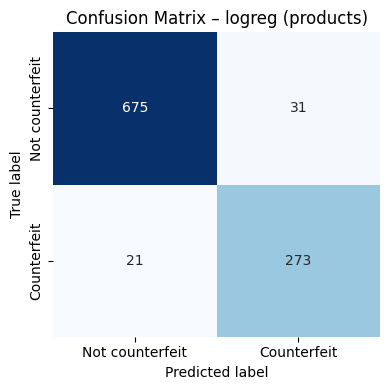

<Figure size 500x400 with 0 Axes>

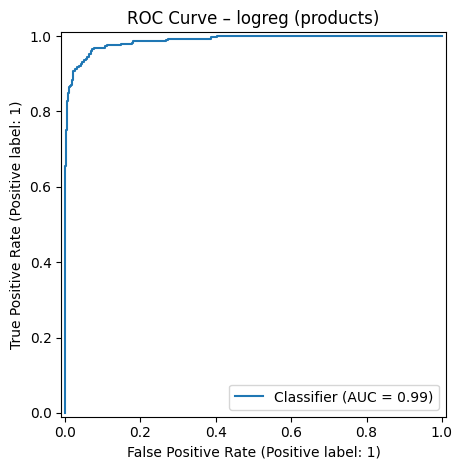

<Figure size 500x400 with 0 Axes>

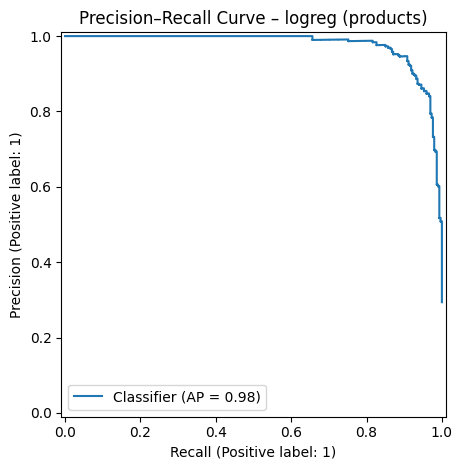

In [91]:
#plotting
evaluate_and_plot_classifier(
    clf,
    X_test,
    y_test,
    model_name="logreg",
    dataset_name="products",
    df=df_products
)

In [ ]:

# Define the KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5,     # look at 5 nearest neighbors
    weights="distance",# closer neighbors have more influence
    n_jobs=-1,         # use all CPU cores (for distance computations)
)

# Pipeline: preprocessing -> KNN model
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", knn),
])

# Train the model
clf.fit(X_train, y_train)

trained_models["knn"] = clf

# Evaluate on the test set
product_results["knn"] = evaluate_classifier(
    clf,
    X_test,
    y_test,
    model_name="knn",
    dataset_name="transactions",
)



=== knn on transactions ===
Accuracy : 0.8750
Precision: 0.8141
Recall   : 0.7449
F1-score : 0.7780
ROC-AUC  : 0.9043


=== knn (products) ===
              precision    recall  f1-score   support

           0     0.8974    0.9292    0.9130       706
           1     0.8141    0.7449    0.7780       294

    accuracy                         0.8750      1000
   macro avg     0.8558    0.8370    0.8455      1000
weighted avg     0.8729    0.8750    0.8733      1000

ROC-AUC: 0.9043


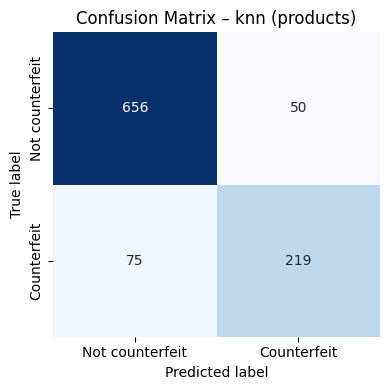

<Figure size 500x400 with 0 Axes>

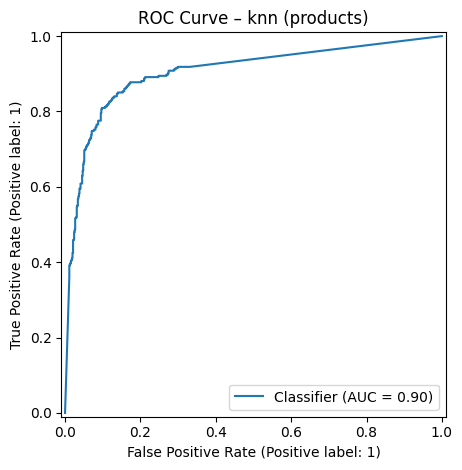

<Figure size 500x400 with 0 Axes>

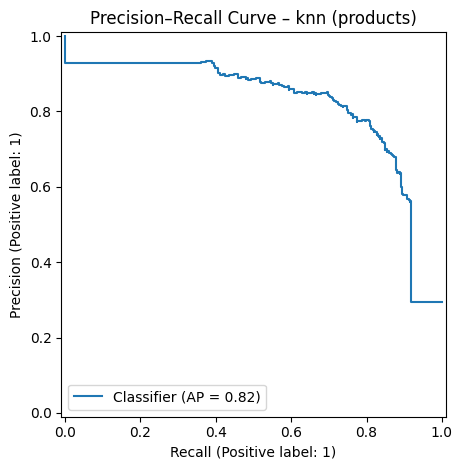

In [93]:
#plotting
evaluate_and_plot_classifier(
    clf,
    X_test,
    y_test,
    model_name="knn",
    dataset_name="products",
    df=df_products
)

In [ ]:

# Define the Gradient Boosting classifier
gb = GradientBoostingClassifier(
    random_state=42,  # reproducible
)

# Pipeline: preprocessing -> GB model
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", gb),
])

# Train the model
clf.fit(X_train, y_train)

trained_models["gb"] = clf

# Evaluate on the test set
product_results["gb"] = evaluate_classifier(
    clf,
    X_test,
    y_test,
    model_name="gb",
    dataset_name="products",
)


=== gb on products ===
Accuracy : 0.9630
Precision: 0.9541
Recall   : 0.9184
F1-score : 0.9359
ROC-AUC  : 0.9906


=== gb (products) ===
              precision    recall  f1-score   support

           0     0.9665    0.9816    0.9740       706
           1     0.9541    0.9184    0.9359       294

    accuracy                         0.9630      1000
   macro avg     0.9603    0.9500    0.9549      1000
weighted avg     0.9629    0.9630    0.9628      1000

ROC-AUC: 0.9906


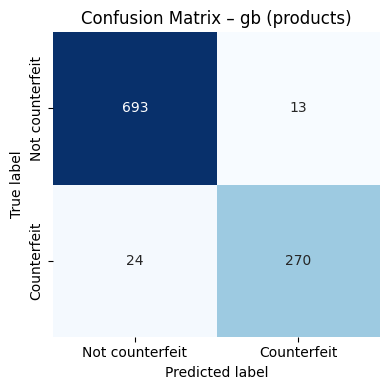

<Figure size 500x400 with 0 Axes>

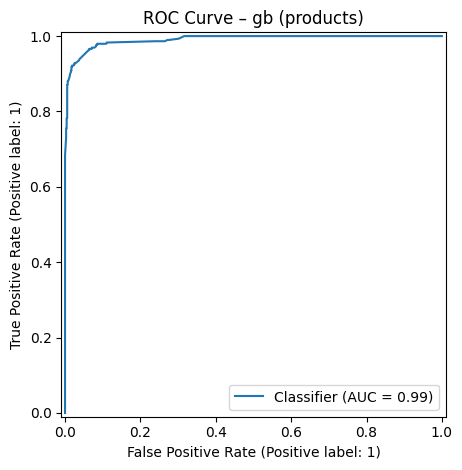

<Figure size 500x400 with 0 Axes>

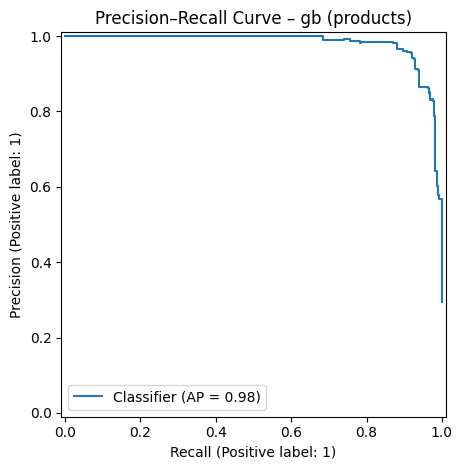

In [95]:
#plotting
evaluate_and_plot_classifier(
    clf,
    X_test,
    y_test,
    model_name="gb",
    dataset_name="products",
    df=df_products
)

In [ ]:

# Define SVM with RBF kernel
svm = SVC(
    kernel="rbf",       # non-linear classifier
    probability=True,   # enable predict_proba for ROC-AUC
    random_state=42,    # reproducible
    class_weight="balanced",
)

# Pipeline: preprocessing -> SVM model
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", svm),
])

# Train the model
clf.fit(X_train, y_train)

trained_models["svm"] = clf

# Evaluate on the test set
product_results["svm"] = evaluate_classifier(
    clf,
    X_test,
    y_test,
    model_name="svm",
    dataset_name="products",
)


=== svm on products ===
Accuracy : 0.9340
Precision: 0.8701
Recall   : 0.9116
F1-score : 0.8904
ROC-AUC  : 0.9784


=== svm (products) ===
              precision    recall  f1-score   support

           0     0.9624    0.9433    0.9528       706
           1     0.8701    0.9116    0.8904       294

    accuracy                         0.9340      1000
   macro avg     0.9163    0.9275    0.9216      1000
weighted avg     0.9353    0.9340    0.9344      1000

ROC-AUC: 0.9784


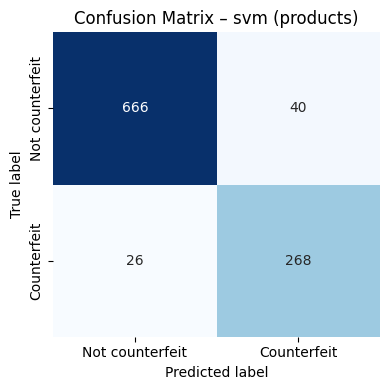

<Figure size 500x400 with 0 Axes>

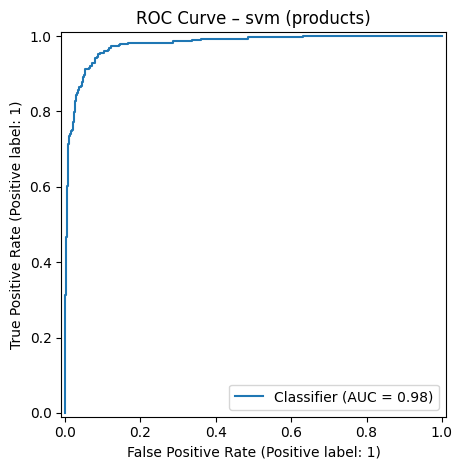

<Figure size 500x400 with 0 Axes>

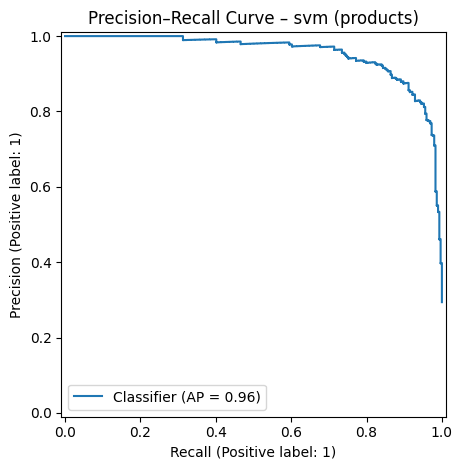

In [97]:
#plotting
evaluate_and_plot_classifier(
    clf,
    X_test,
    y_test,
    model_name="svm",
    dataset_name="products",
    df=df_products
)

In [ ]:
# Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

# Pipeline: preprocessing → RandomForest
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf),
])

# Train
clf.fit(X_train, y_train)

trained_models["rf"] = clf

# Evaluate
product_results["rf"] = evaluate_classifier(
    clf,
    X_test,
    y_test,
    model_name="rf",
    dataset_name="products",
)


=== rf on products ===
Accuracy : 0.9630
Precision: 0.9477
Recall   : 0.9252
F1-score : 0.9363
ROC-AUC  : 0.9896


=== rf (products) ===
              precision    recall  f1-score   support

           0     0.9691    0.9788    0.9739       706
           1     0.9477    0.9252    0.9363       294

    accuracy                         0.9630      1000
   macro avg     0.9584    0.9520    0.9551      1000
weighted avg     0.9629    0.9630    0.9629      1000

ROC-AUC: 0.9896


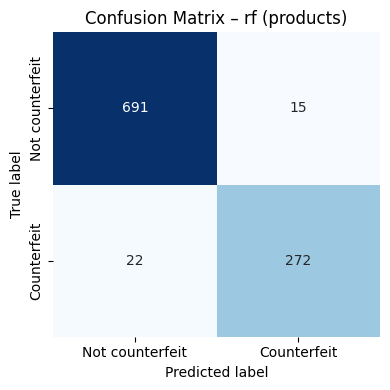

<Figure size 500x400 with 0 Axes>

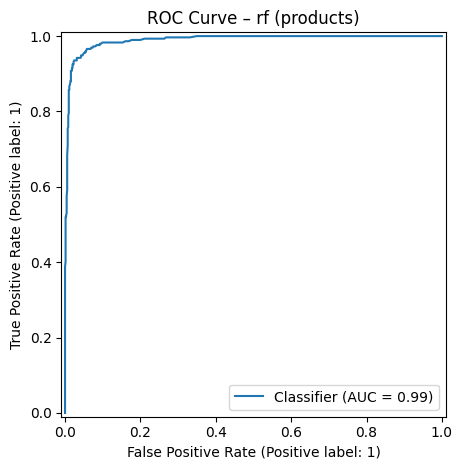

<Figure size 500x400 with 0 Axes>

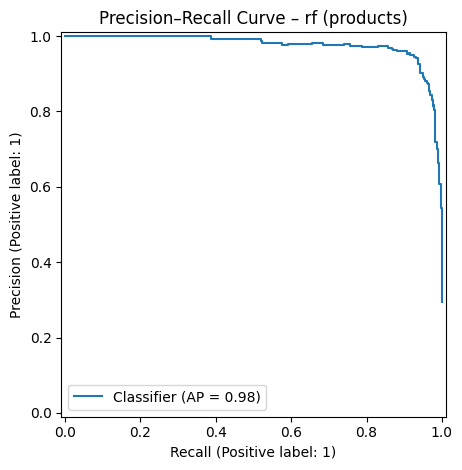

In [99]:
#plotting
evaluate_and_plot_classifier(
    clf,
    X_test,
    y_test,
    model_name="rf",
    dataset_name="products",
    df=df_products
)

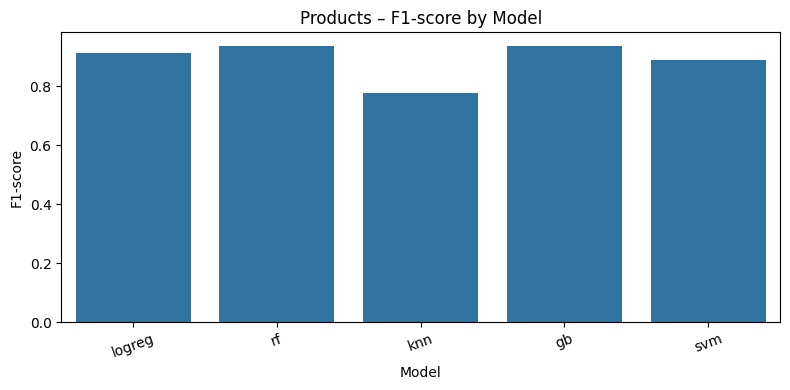

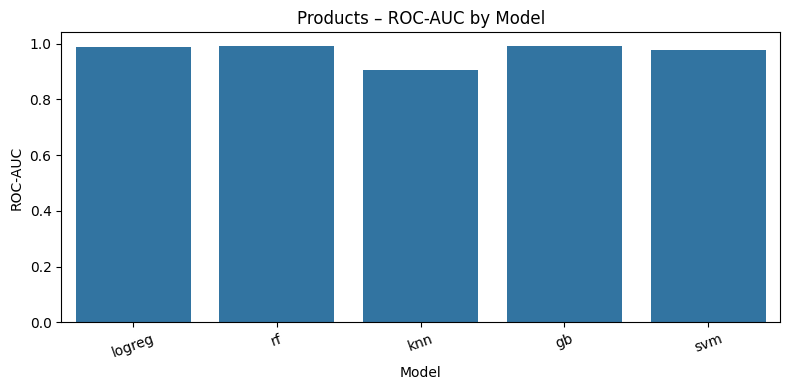

In [ ]:
# ALSO NEED A COMPARISON OF ALL MODEL PERFOMANCES
results_df = pd.DataFrame.from_dict(product_results, orient="index")
results_df.index.name = "model"
results_df
# F1-score comparison
plt.figure(figsize=(8, 4))
sns.barplot(
    data=results_df.reset_index(),
    x="model",
    y="f1",
)
plt.title("Products - F1-score by Model")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


plt.title("Products - ROC-AUC by Model")
plt.xlabel("Model")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

for model_name, model in trained_models.items():
    # Get score vector
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        continue  # skip models with no scoring output

    RocCurveDisplay.from_predictions(
        y_test,
        y_scores,
        name=model_name,
        ax=plt.gca()
    )

plt.title("Combined ROC Curves - Products Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))

for model_name, model in trained_models.items():
    # Get scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        continue

    PrecisionRecallDisplay.from_predictions(
        y_test,
        y_scores,
        name=model_name,
        ax=plt.gca()
    )

plt.title("Combined Precision-Recall Curves - Products Dataset")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
